<a href="https://colab.research.google.com/github/SJhawar1010/Quantum-Computing/blob/main/Satyam_554_QC_Lab5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lab5


### Methodology.

In [ ]:
%pip install qiskit -q
%pip install qiskit_aer -q
%pip install pylatexenc -q

In [ ]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
from qiskit.result import marginal_distribution
from qiskit.circuit.library import UGate
from numpy import pi, random
import numpy as np

In [ ]:
qubit = QuantumRegister(1, "Q")
ebit0 = QuantumRegister(1, "A")
ebit1 = QuantumRegister(1, "B")
a = ClassicalRegister(1, 'a')
b = ClassicalRegister(1, 'b')
protocol = QuantumCircuit(qubit, ebit0, ebit1, a, b)

protocol.h(ebit0)
protocol.cx(ebit0, ebit1)
protocol.barrier()

protocol.cx(qubit, ebit0)
protocol.h(qubit)
protocol.barrier()

CircuitInstruction(operation=Instruction(name='barrier', num_qubits=3, num_clbits=0, params=[]), qubits=(Qubit(QuantumRegister(1, 'Q'), 0), Qubit(QuantumRegister(1, 'A'), 0), Qubit(QuantumRegister(1, 'B'), 0)), clbits=())

In [ ]:
protocol.cx(qubit, ebit0)
protocol.h(qubit)
protocol.barrier()

protocol.measure(ebit0, a)
protocol.measure(qubit, b)
protocol.barrier()

with protocol.if_test((a,1)):
  protocol.x(ebit1)
with protocol.if_test((b,1)):
  protocol.z(ebit1)

display(protocol.draw())

░      ┌───┐ ░      ┌───┐ ░    ┌─┐ ░                        »
  Q: ───────────░───■──┤ H ├─░───■──┤ H ├─░────┤M├─░────────────────────────»
     ┌───┐      ░ ┌─┴─┐└───┘ ░ ┌─┴─┐└───┘ ░ ┌─┐└╥┘ ░                        »
  A: ┤ H ├──■───░─┤ X ├──────░─┤ X ├──────░─┤M├─╫──░────────────────────────»
     └───┘┌─┴─┐ ░ └───┘      ░ └───┘      ░ └╥┘ ║  ░ ┌────── ┌───┐ ───────┐ »
  B: ─────┤ X ├─░────────────░────────────░──╫──╫──░─┤ If-0  ┤ X ├  End-0 ├─»
          └───┘ ░            ░            ░  ║  ║  ░ └──╥─── └───┘ ───────┘ »
                                             ║  ║    ┌──╨──┐                »
a: 1/════════════════════════════════════════╩══╬════╡ 0x1 ╞════════════════»
                                             0  ║    └─────┘                »
b: 1/═══════════════════════════════════════════╩═══════════════════════════»
                                                0                           »
«                            
«  Q: ───────────────────────
«                            
«  A: ───────────────────────
«     ┌────── ┌───┐ ───────┐ 
«  B: ┤ If-0  ┤ Z ├  End-0 ├─
«     └──╥─── └───┘ ───────┘ 
«a: 1/═══╬═══════════════════
«     ┌──╨──┐                
«b: 1/╡ 0x1 ╞════════════════
«     └─────┘

In [ ]:
random_gate = UGate(
    theta = random.random()*2*pi,
    phi = random.random()*2*pi,
    lam = random.random()*2*pi,
)

display(random_gate.to_matrix())

array([[-0.98988718+0.j        , -0.09106586-0.10876758j],
       [-0.12547986+0.06616782j,  0.91612386+0.37495825j]])

In [ ]:
test = QuantumCircuit(qubit, ebit0, ebit1, a, b)
test.append(random_gate, qubit)
test.barrier()
test = test.compose(protocol)
test.barrier()
test.append(random_gate.inverse(), ebit1)

In [ ]:
result = ClassicalRegister(1, 'Result')
test.add_register(result)
test.measure(ebit1, result)

display(test.draw())

┌──────────────────────────┐ ░            ░      ┌───┐ ░      ┌───┐»
       Q: ┤ U(5.9985,2.6563,0.87375) ├─░────────────░───■──┤ H ├─░───■──┤ H ├»
          └──────────────────────────┘ ░ ┌───┐      ░ ┌─┴─┐└───┘ ░ ┌─┴─┐└───┘»
       A: ─────────────────────────────░─┤ H ├──■───░─┤ X ├──────░─┤ X ├─────»
                                       ░ └───┘┌─┴─┐ ░ └───┘      ░ └───┘     »
       B: ─────────────────────────────░──────┤ X ├─░────────────░───────────»
                                       ░      └───┘ ░            ░           »
     a: 1/═══════════════════════════════════════════════════════════════════»
                                                                             »
     b: 1/═══════════════════════════════════════════════════════════════════»
                                                                             »
Result: 1/═══════════════════════════════════════════════════════════════════»
                                                                             »
«           ░    ┌─┐ ░                                                ░ »
«       Q: ─░────┤M├─░────────────────────────────────────────────────░─»
«           ░ ┌─┐└╥┘ ░                                                ░ »
«       A: ─░─┤M├─╫──░────────────────────────────────────────────────░─»
«           ░ └╥┘ ║  ░ ┌────── ┌───┐ ───────┐ ┌────── ┌───┐ ───────┐  ░ »
«       B: ─░──╫──╫──░─┤ If-0  ┤ X ├  End-0 ├─┤ If-0  ┤ Z ├  End-0 ├──░─»
«           ░  ║  ║  ░ └──╥─── └───┘ ───────┘ └──╥─── └───┘ ───────┘  ░ »
«              ║  ║    ┌──╨──┐                   ║                      »
«     a: 1/════╩══╬════╡ 0x1 ╞═══════════════════╬══════════════════════»
«              0  ║    └─────┘                ┌──╨──┐                   »
«     b: 1/═══════╩═══════════════════════════╡ 0x1 ╞═══════════════════»
«                 0                           └─────┘                   »
«Result: 1/═════════════════════════════════════════════════════════════»
«                                                                       »
«                                            
«       Q: ──────────────────────────────────
«                                            
«       A: ──────────────────────────────────
«          ┌─────────────────────────────┐┌─┐
«       B: ┤ U(-5.9985,-0.87375,-2.6563) ├┤M├
«          └─────────────────────────────┘└╥┘
«     a: 1/════════════════════════════════╬═
«                                          ║ 
«     b: 1/════════════════════════════════╬═
«                                          ║ 
«Result: 1/════════════════════════════════╩═
«                                          0

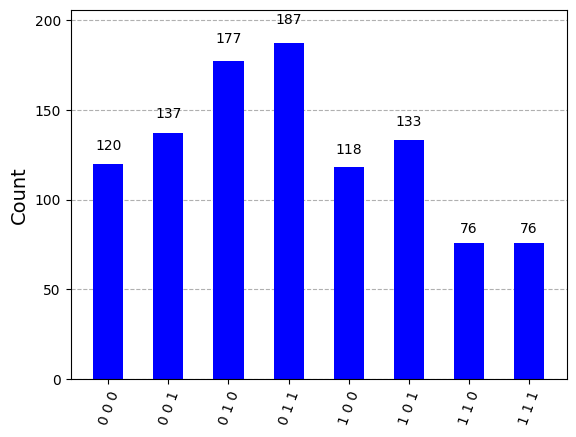

In [ ]:
result = AerSimulator().run(test).result()
stats = result.get_counts()
plot_histogram(stats, color='blue')

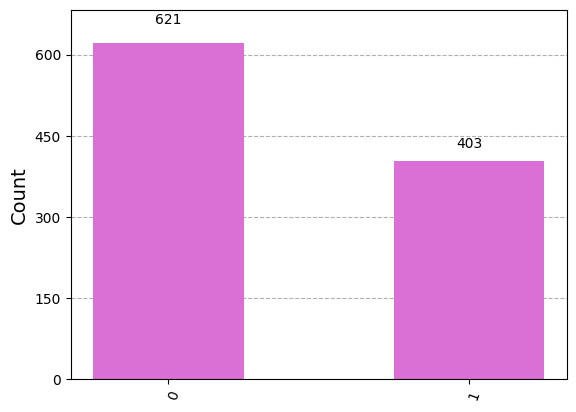

In [ ]:
filtered_stats = marginal_distribution(stats, [2])
plot_histogram(filtered_stats, color='orchid')

### Compiling.

In [ ]:
def teleportation_protocol(input_state):
  qubit = QuantumRegister(1, "Q")
  ebit0 = QuantumRegister(1, "A")
  ebit1 = QuantumRegister(1, "B")
  a = ClassicalRegister(1, "a")
  b = ClassicalRegister(1, "b")
  protocol = QuantumCircuit(qubit, ebit0, ebit1, a, b)
  # a) Implement quantum gates using teleportation
  protocol.h(ebit0)
  protocol.cx(ebit0, ebit1)
  if input_state == 0:
    protocol.initialize([1, 0], qubit)
  elif input_state == 1:
    protocol.initialize([0, 1], qubit)
  else:
    theta, phi, lam = random.random() * 2 * np.pi, random.random() * 2 * np.pi, random.random() * 2 * np.pi
    random_gate = UGate(theta, phi, lam)
    protocol.append(random_gate, [qubit[0]])
  # b) Use the barrier function to create visual separation
  protocol.barrier()
  protocol.cx(qubit, ebit0)
  protocol.h(qubit)
  protocol.barrier()
  protocol.measure(ebit0, a)
  protocol.measure(qubit, b)
  protocol.barrier()
  with protocol.if_test((a, 1)):
    protocol.x(ebit1)
  with protocol.if_test((b, 1)):
    protocol.z(ebit1)
  # c) Test that the protocol works correctly for different state vectors
  display(protocol.draw(output="mpl"))
  # d) Proof that Q was successfully teleported into B
  result = ClassicalRegister(1, "Result")
  protocol.add_register(result)
  protocol.measure(ebit1, result)
  simulator = AerSimulator()
  results = simulator.run(protocol).result()
  statistics = results.get_counts()
  display(plot_histogram(statistics, color='plum'))
  filtered_statistics = marginal_distribution(statistics, [2])
  display(plot_histogram(filtered_statistics, color='peru'))

### Results for **0**

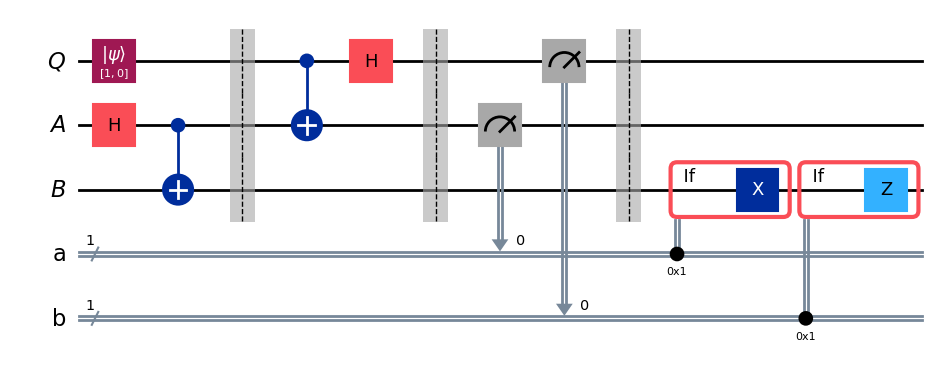

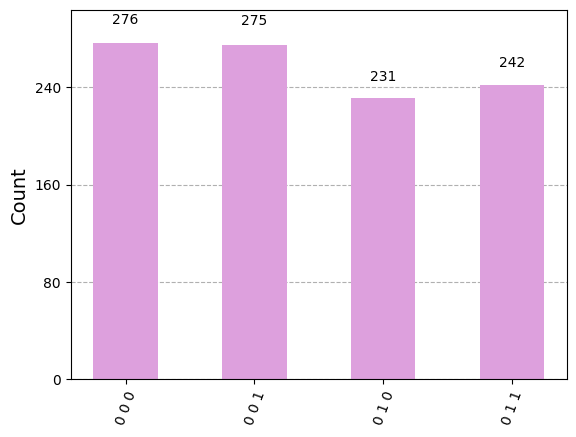

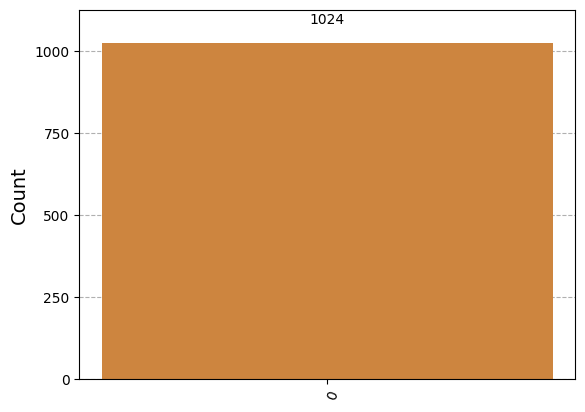

In [ ]:
teleportation_protocol(0)

### Results for **1**

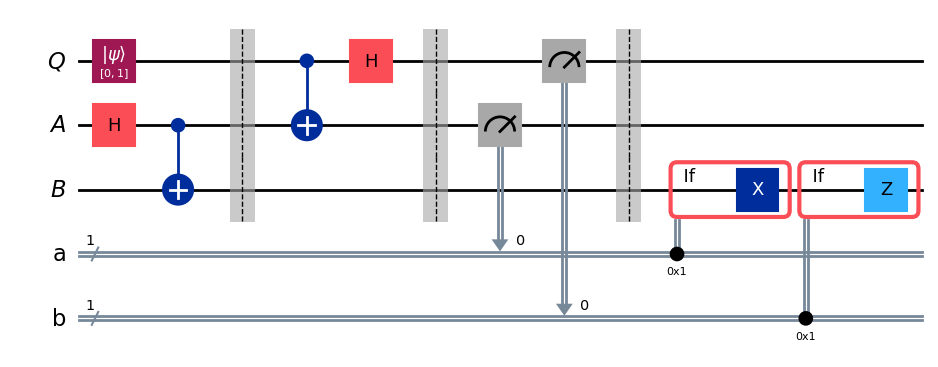

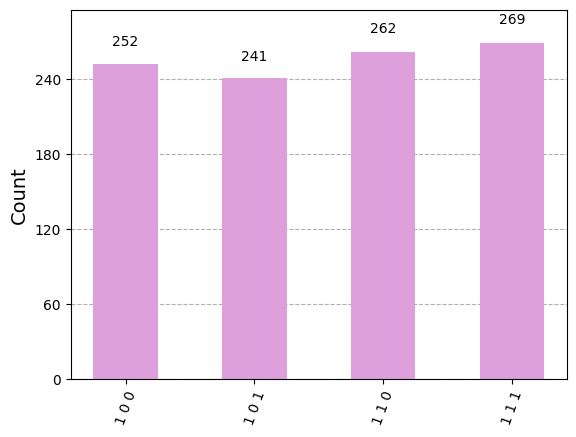

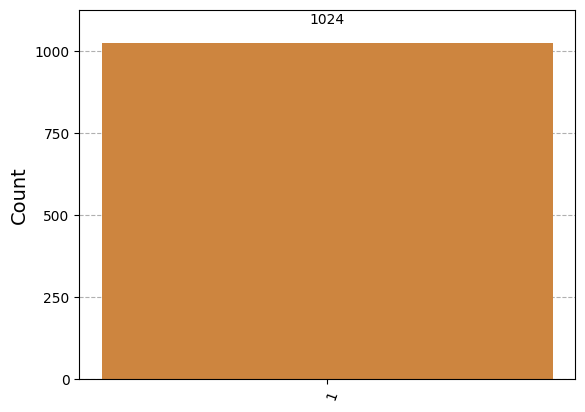

In [ ]:
teleportation_protocol(1)